# Στοχαστικές Διαδικασίες 
## 4η Εργαστηριακή Άσκηση
## Λεωνίδας Αβδελάς, 03113182

In [59]:
import numpy as np
import statistics as stat
from numpy.random import choice


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 12)  # default figure size

In [29]:
# random walk generator:
def rand_walk_Z(start = 0, probs = (0.5, 0.5)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever if needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

# Άσκηση 1

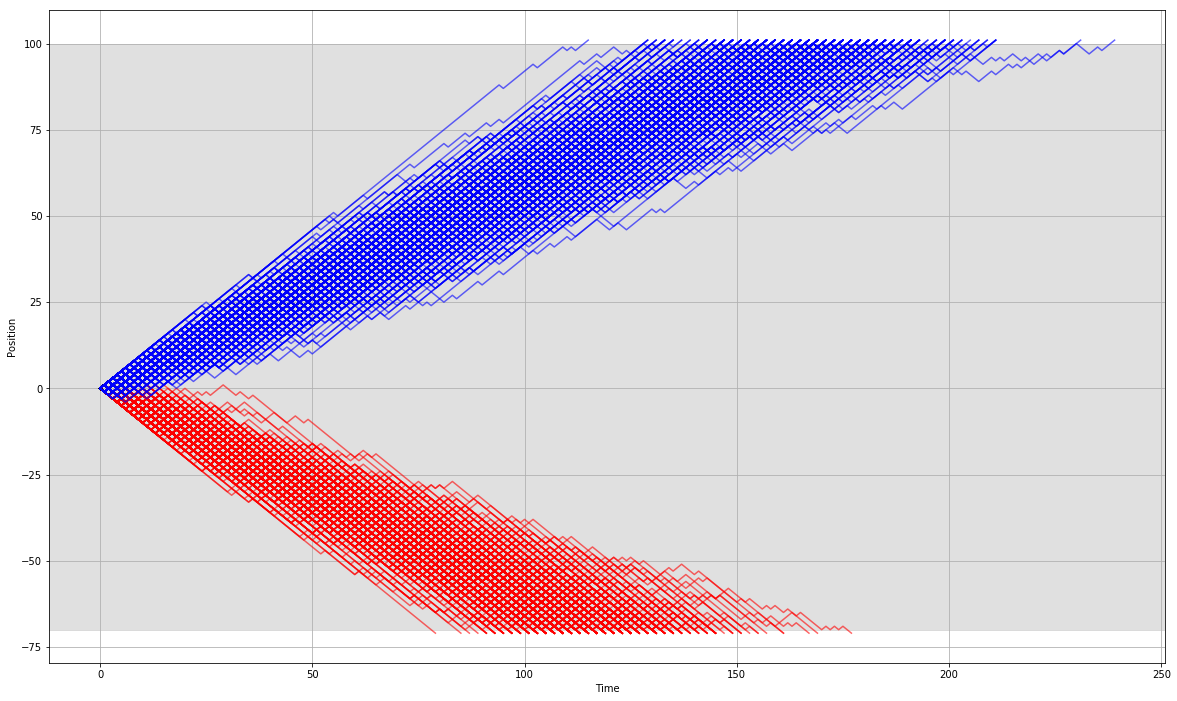

In [36]:
fig = plt.figure()  # initiate figure

N = 500 # sample size
a = -70  # lower boundary
b = 100  # upper boundary

escape_time = np.zeros(2*N, dtype=int)  # to store the exit time

for i in range(N):
    walker1 = rand_walk_Z(probs = (0.8, 0.2))  # start new symmetric walk from 0
    x = 0  # start position 0
    t = 0
    chain = [x]  # save positions to plot

    while a <= x <= b:
        x = next(walker1)
        chain.append(x)
        t += 1
    escape_time[i] = t
    plt.plot(chain, color='r', alpha = 0.6)

for i in range(N):
    walker2 = rand_walk_Z(0, probs = (0.2, 0.8))  # start new symmetric walk from 0
    x = 0  # start position 0
    t = 0
    chain = [x]  # save positions to plot

    while a <= x <= b:
        x = next(walker2)
        chain.append(x)
        t += 1
    plt.plot(chain, color='b', alpha = 0.6)
    escape_time[500 + i] = t
    
# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.6)  # box between a & b
plt.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()

## Ερώτηση 1

Στα αποτελέσματα μας παρατηρούμε ότι ο χρόνος που χρειάζεται για να φτάσουν οι διαδρομές με τάση προς τα αριστερά είναι μικρότερος από αυτών με τάση προς τα δεξιά, γεγονός αναμενόμενο αφού το όριο προς τα αριστερά είναι 30 βήματα μικρότερο απο αυτό προς τα δεξιά.

Ακόμα, βλέπουμε ότι υπάρχει πολύ ξεκάθαρη μετακίνηση προς την κατεύθυνση με τάση, γεγονός επίσης αναμενόμενο, λόγω της πολύ μεγαλύτερης πιθανότητας προς αυτή την κατεύθυνση.


## Ερώτηση 2

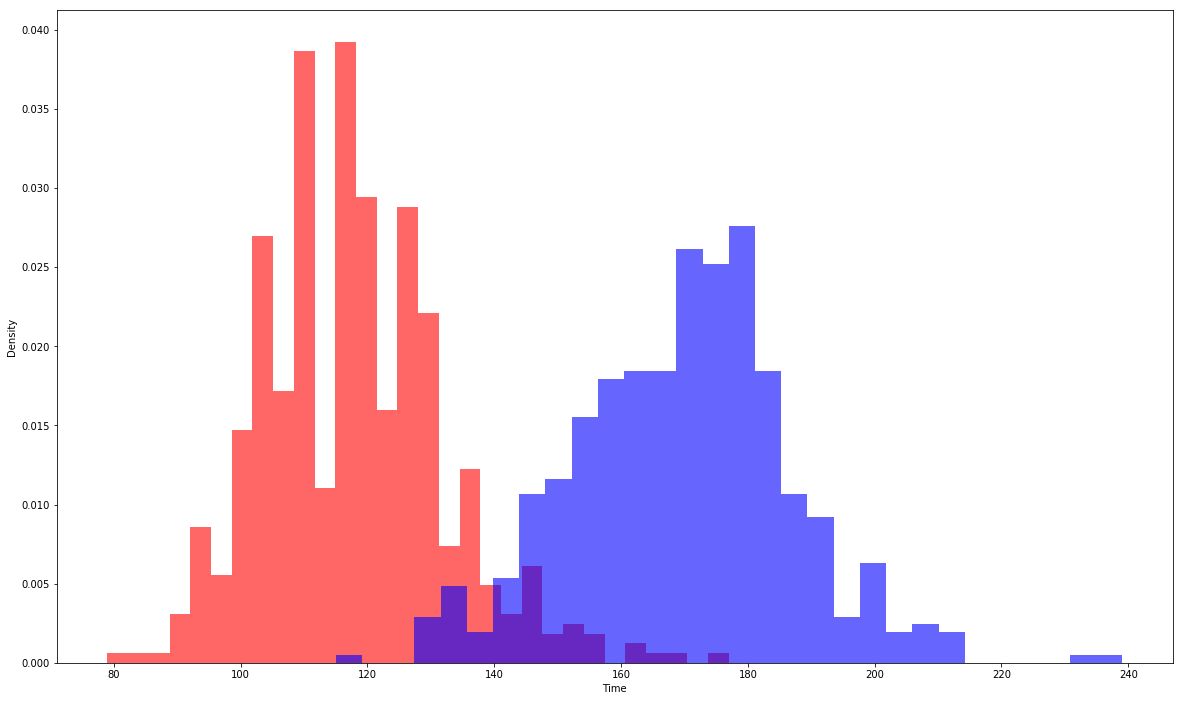

In [37]:
plt.figure()

plt.hist(escape_time[0:N-1], bins=30, color = 'r', density=True, alpha = 0.6)
plt.hist(escape_time[N:2*N-1], bins=30, color = 'b', density=True, alpha = 0.6)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

# Άσκηση 2


In [39]:
# random walk generator:
def rand_walk_Z_plus(start = 0, probs = (2/3, 1/3), probs_0 = (2/3, 1/3)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    steps_0 = [0, 1]
    while True:  # continue for ever if needed
        if x == 0:
            x += choice(steps_0, p=probs_0)
        else:
            x += choice(steps, p=probs)
        yield x  # it's a generator!

In [55]:
N = 1000
data_x_100 = np.zeros(N, dtype=int)
max_pos = np.zeros(N, dtype=int)

for i in range(N):
    walker1 = rand_walk_Z_plus()  # start new walk from 0
    x = 0  # start position 0
    curr_max = 0
    for t in range(1000):
        x = next(walker1)
        if curr_max < x:
            curr_max = x
        if t == 100:
            data_x_100[i] = x
    max_pos[i] = curr_max

## Ερώτηση 1

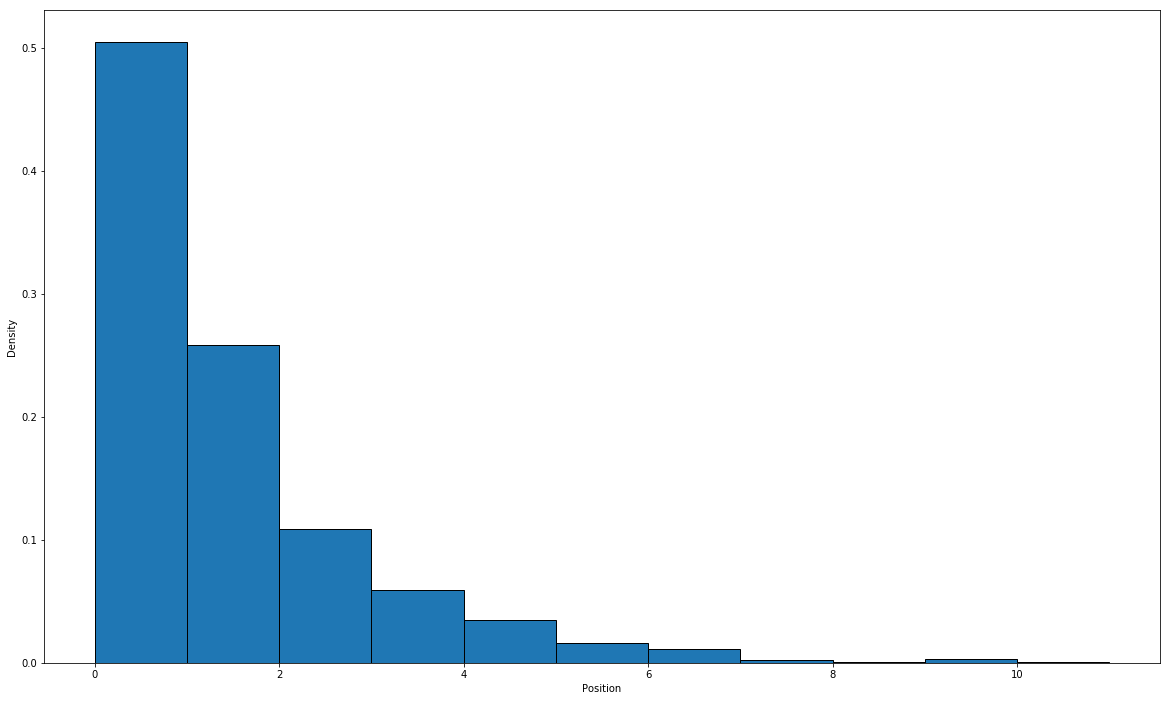

In [53]:
plt.figure()

plt.hist(data_x_100, bins=max(data_x_100), density=True, edgecolor='black')
plt.xlabel('Position')
plt.ylabel('Density')
plt.show()

## Ερώτηση 2

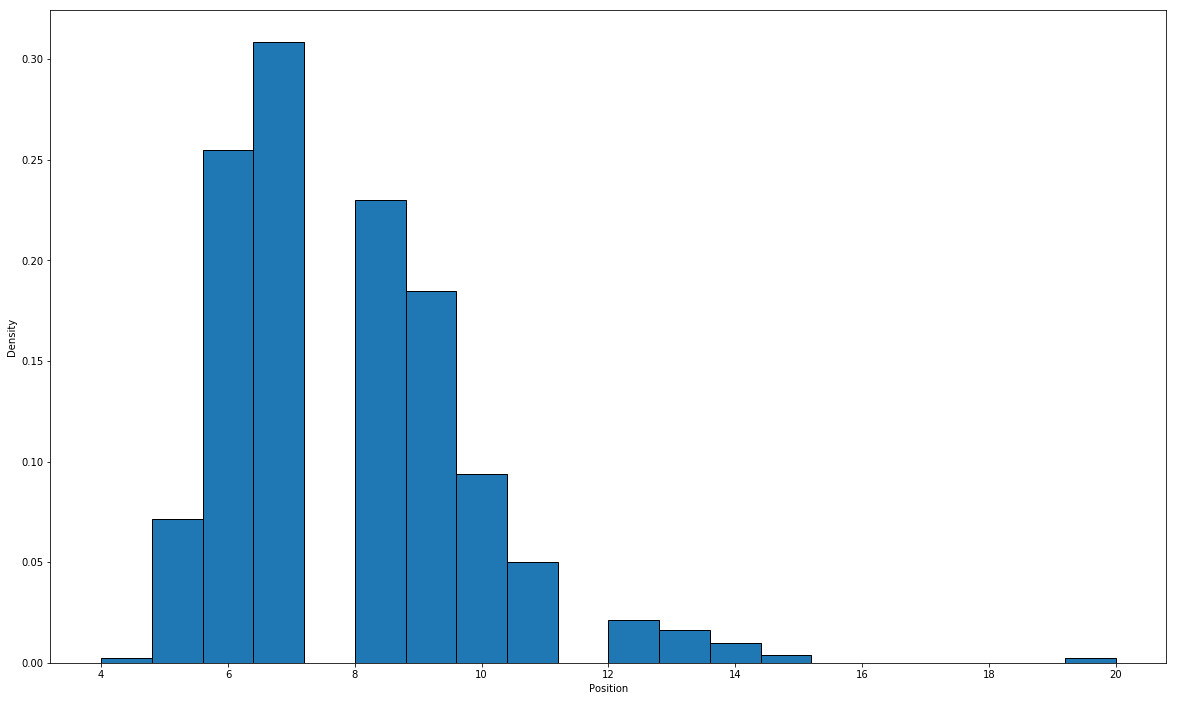

In [57]:
plt.figure()

plt.hist(max_pos, bins=max(max_pos), density=True, edgecolor='black')
plt.xlabel('Position')
plt.ylabel('Density')
plt.show()

In [60]:
print('Mean value is %.2f' % stat.mean(max_pos))

Mean value is 7.00


In [61]:
print('Variance is %.2f' % stat.variance(max_pos))

Variance is 3.00


# Άσκηση 3

In [62]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y

In [81]:
rad = np.linspace(10, 100, 10)
N = 500 # samples

times = np.zeros((N, len(rad)), dtype=int)

for j in range(len(rad)):
    r = rad[j]
    r2 = r**2  # square of radius
    time = np.zeros(N, dtype=int)

    for i in range(N):  
        x, y = 0, 0  # start position 0
        X, Y = [0], [0]  # store positions
        t = 0
        walker = rand_walk_Z2()  # start new symmetric walk from 0, 0
        while x**2 + y**2 < r2:
            x, y = next(walker)
            X.append(x)
            Y.append(y)
            t += 1
        time[i] = t
    times[:, j] = time

        #X = np.array(X) + np.random.randn(len(X))/3
        #Y = np.array(Y) + np.random.randn(len(Y))/3
means = np.mean(times, axis=0)

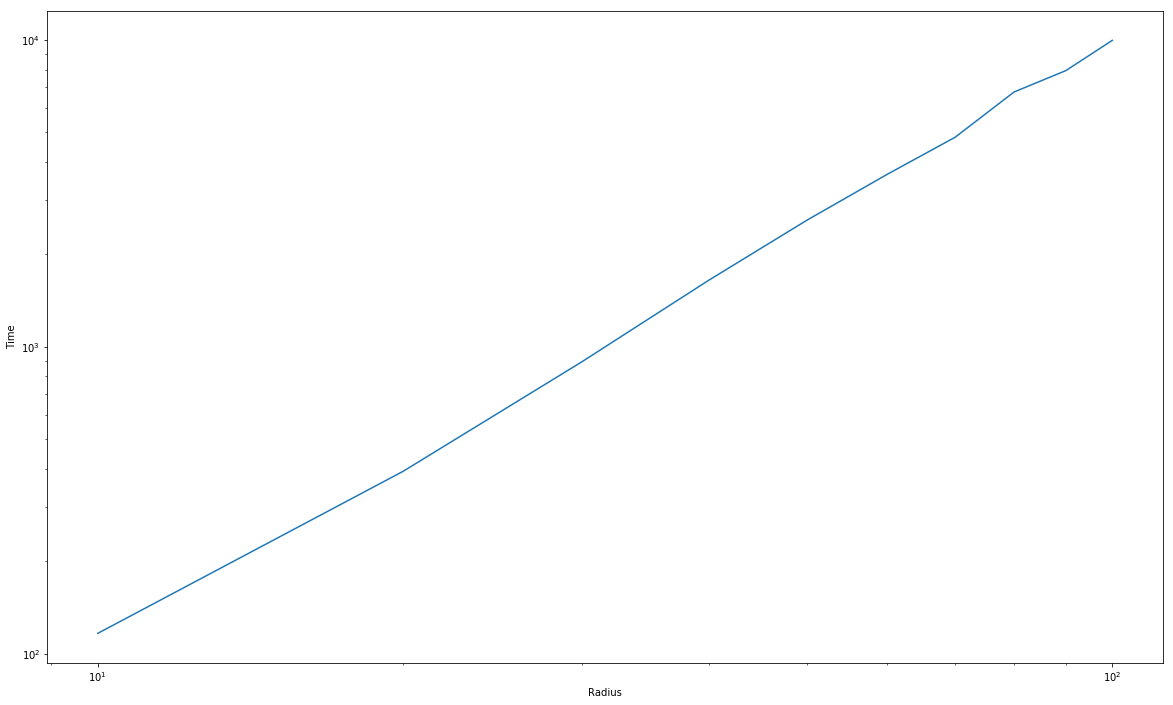

The line that fits the data is y = 2.0 *x + 0.0 .


In [89]:
plt.figure()
plt.loglog(rad, means)
plt.xlabel('Radius')
plt.ylabel('Time')
plt.show()

z = np.polyfit(np.log(rad), np.log(means), 1)
print('The line that fits the data is y =', np.round(z[0]), '*x +', np.round(z[1]),'.')

### Σχολιασμός

Όπως βλέπουμε στην γραφική μας παράσταση, και από την γραμμική παρεμβολή, η κλίση της ευθείας στον λογαριθμικό άξονα είναι περίπου 2. Δηλαδή ο χρόνος που χρειάζεται για να βγεί μια αλυσίδα από την ακτίνα R είναι ανάλογος με το τετράγωνο της ακτίνας αυτής, γεγονός που σχετίζεται με το γεγονός ότι κάθε  φορά η κίνηση είναι προς μία από τις δύο κατευθύνσεις.